# Kaggle compet - Congressional Voting

https://www.kaggle.com/competitions/184702-tu-ml-ss-22-congressional-voting/data

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Load dataset

In [7]:
df  = pd.read_csv("CongressionalVotingID.shuf.lrn.csv", sep=',')
df

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,15,republican,n,y,n,y,y,y,n,n,n,n,n,y,unknown,unknown,n,unknown
1,326,democrat,n,y,n,n,y,y,n,n,unknown,n,n,y,y,y,n,y
2,93,democrat,y,y,y,n,n,n,y,y,n,y,y,n,n,unknown,y,y
3,350,republican,n,y,y,y,y,y,y,y,y,n,n,y,y,y,n,y
4,283,republican,y,n,n,y,y,y,n,n,n,y,n,unknown,y,y,n,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,290,democrat,y,y,y,n,y,y,n,y,n,y,y,n,y,y,n,unknown
214,286,democrat,n,n,y,n,n,y,y,y,y,y,y,n,n,n,y,y
215,95,democrat,y,n,y,n,y,y,n,n,n,n,n,n,n,n,n,y
216,372,democrat,y,y,y,n,unknown,n,y,y,y,y,n,n,n,n,y,unknown


- 1 target 

- 17 attributs : all the attributs seems to be qualitive except the ID 

218 samples

## Target

we have 147 democrats and 71 republicans

In [8]:
target = df["class"]

In [9]:
np.unique(target, return_counts=True)

(array(['democrat', 'republican'], dtype=object), array([147,  71]))

Text(0.5, 1.0, 'Target distribution')

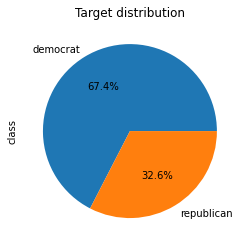

In [10]:
target.value_counts().plot.pie(autopct='%1.1f%%').set_title("Target distribution")

In [11]:
target.isna().sum()

0

In [12]:
target.isnull().sum()

0

## Data

the ID is unique for all samples 

Each attributes is a True False attribute and has some nan values noted as "unknown"

In [13]:
data = df.drop(columns=["class"])
data

,ID,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,15,n,y,n,y,y,y,n,n,n,n,n,y,unknown,unknown,n,unknown
1,326,n,y,n,n,y,y,n,n,unknown,n,n,y,y,y,n,y
2,93,y,y,y,n,n,n,y,y,n,y,y,n,n,unknown,y,y
3,350,n,y,y,y,y,y,y,y,y,n,n,y,y,y,n,y
4,283,y,n,n,y,y,y,n,n,n,y,n,unknown,y,y,n,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,290,y,y,y,n,y,y,n,y,n,y,y,n,y,y,n,unknown
214,286,n,n,y,n,n,y,y,y,y,y,y,n,n,n,y,y
215,95,y,n,y,n,y,y,n,n,n,n,n,n,n,n,n,y
216,372,y,y,y,n,unknown,n,y,y,y,y,n,n,n,n,y,unknown


In [14]:
data.nunique()

ID                                        218
handicapped-infants                         3
water-project-cost-sharing                  3
adoption-of-the-budget-resolution           3
physician-fee-freeze                        3
el-salvador-aid                             3
religious-groups-in-schools                 3
anti-satellite-test-ban                     3
aid-to-nicaraguan-contras                   3
mx-missile                                  3
immigration                                 3
synfuels-crporation-cutback                 3
education-spending                          3
superfund-right-to-sue                      3
crime                                       3
duty-free-exports                           3
export-administration-act-south-africa      3
dtype: int64

### Missing values

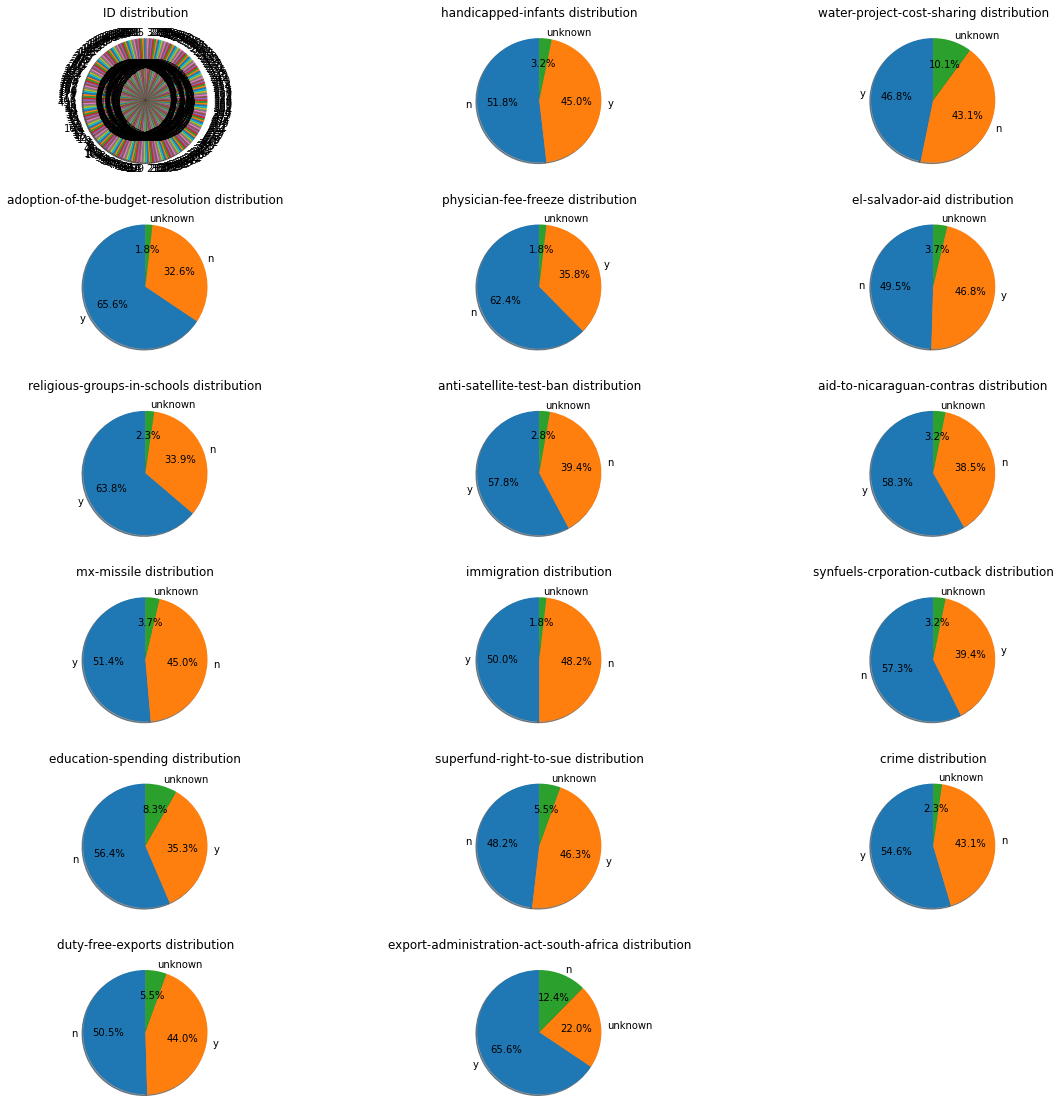

In [15]:
plt.figure(figsize=(20,20))

for i, col in enumerate(data.columns) :
    plt.subplot(6,3, i+1)
    
    values = data[col].value_counts().values.tolist()
    label = data[col].value_counts().index.tolist()
    
    plt.pie(values, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title(col+" distribution")
    
plt.show()

/home/artmoulini/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


<AxesSubplot:>

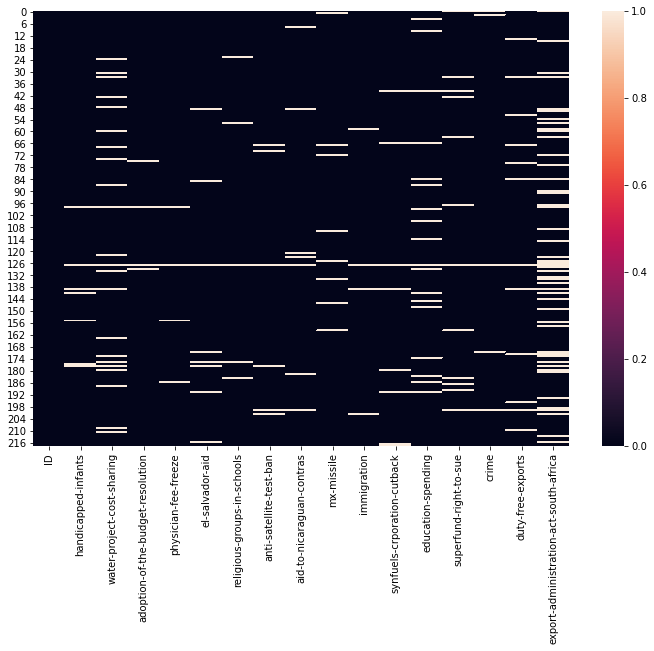

In [16]:
# Plot of all the missing values 
plt.figure(figsize=(12,8))
sns.heatmap(data == "unknown")

We can already noticed that a row around 126 is missing a lot of values

In [17]:
# Converting column values with True, False, Nan values instead of 'y','n', and 'unknown' :
# easier for the data manipulation
convert_data = data.copy()

def convert_na(val):
    if val == "unknown" :
        return math.nan
    return val == 'y'

for col in convert_data.columns :
    convert_data[col] = convert_data[col].apply(lambda x : convert_na(x))
    
convert_data["is_democrat"] = target.apply(lambda x : x == "democrat")
convert_data["class"] = df["class"]
convert_data["ID"] = df["ID"]
    
convert_data

,ID,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,is_democrat,class
0,15,False,True,False,True,True,True,False,False,False,False,False,True,NaN,NaN,False,NaN,False,republican
1,326,False,True,False,False,True,True,False,False,NaN,False,False,True,True,True,False,True,True,democrat
2,93,True,True,True,False,False,False,True,True,False,True,True,False,False,NaN,True,True,True,democrat
3,350,False,True,True,True,True,True,True,True,True,False,False,True,True,True,False,True,False,republican
4,283,True,False,False,True,True,True,False,False,False,True,False,NaN,True,True,False,False,False,republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,290,True,True,True,False,True,True,False,True,False,True,True,False,True,True,False,NaN,True,democrat
214,286,False,False,True,False,False,True,True,True,True,True,True,False,False,False,True,True,True,democrat
215,95,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,True,True,democrat
216,372,True,True,True,False,NaN,False,True,True,True,True,False,False,False,False,True,NaN,True,democrat


In [18]:
convert_data['na_count']= convert_data.isna().sum(axis=1)
convert_data

,ID,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,is_democrat,class,na_count
0,15,False,True,False,True,True,True,False,False,False,False,False,True,NaN,NaN,False,NaN,False,republican,3
1,326,False,True,False,False,True,True,False,False,NaN,False,False,True,True,True,False,True,True,democrat,1
2,93,True,True,True,False,False,False,True,True,False,True,True,False,False,NaN,True,True,True,democrat,1
3,350,False,True,True,True,True,True,True,True,True,False,False,True,True,True,False,True,False,republican,0
4,283,True,False,False,True,True,True,False,False,False,True,False,NaN,True,True,False,False,False,republican,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,290,True,True,True,False,True,True,False,True,False,True,True,False,True,True,False,NaN,True,democrat,1
214,286,False,False,True,False,False,True,True,True,True,True,True,False,False,False,True,True,True,democrat,0
215,95,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,True,True,democrat,0
216,372,True,True,True,False,NaN,False,True,True,True,True,False,False,False,False,True,NaN,True,democrat,2


In [19]:
without_ms = convert_data[convert_data['na_count']== 0]
without_ms.shape

(121, 20)

There is only 121 rows without missing values 

In [20]:
# number of republicans without missing values 
without_ms[without_ms["class"] == "republican"].shape[0]

48

<AxesSubplot:xlabel='na_count', ylabel='count'>

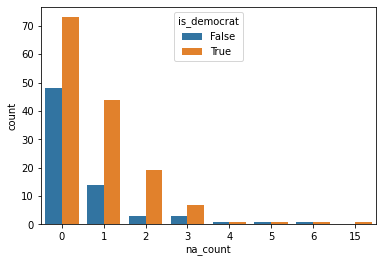

In [21]:
sns.countplot(data = convert_data, x="na_count", hue="is_democrat")

a sample has 15 missing attribute : not really relevant 

### Sample with 15 missing values

Its ID is 127, we just note it for the preprocessing -> we will drop this row

In [22]:
convert_data["ID"] = df["ID"]
sample = convert_data[convert_data["na_count"] == 15] 
sample

,ID,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,is_democrat,class,na_count
127,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,democrat,15


### Attributes Visualisation

There is just water-project-cost-sharing that is not really relevant.

We can try a model with and another without this attribute.

In [23]:
data = df.drop(columns = ["ID"])

handicapped-infants


/home/artmoulini/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


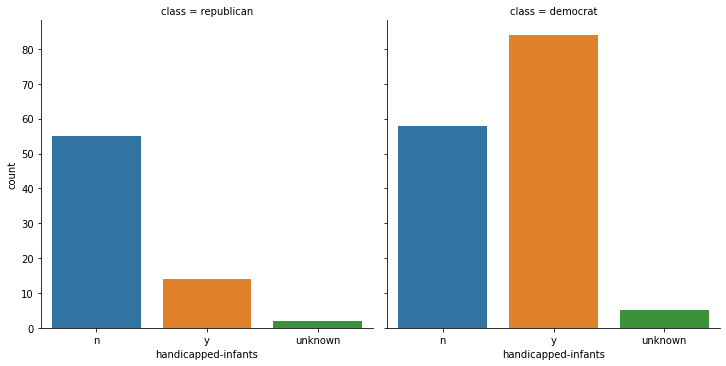

water-project-cost-sharing


/home/artmoulini/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


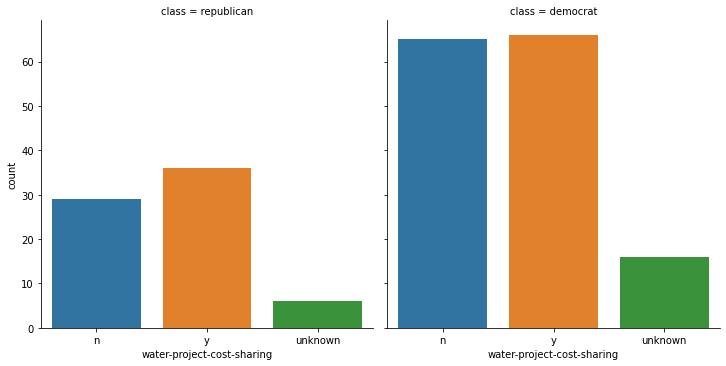

adoption-of-the-budget-resolution


/home/artmoulini/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


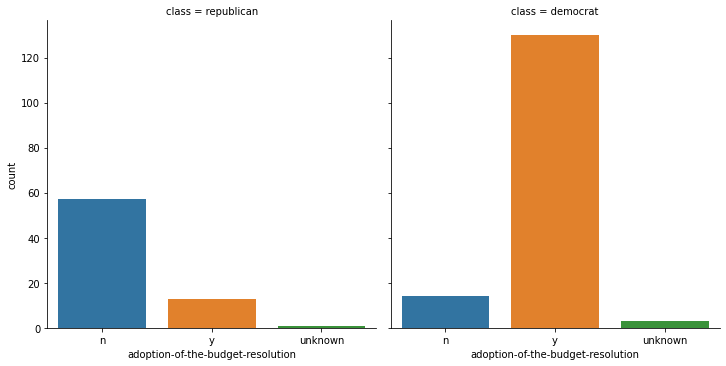

physician-fee-freeze


/home/artmoulini/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


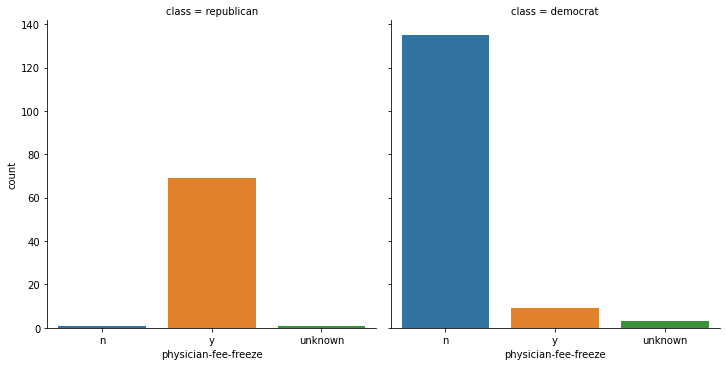

el-salvador-aid


/home/artmoulini/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


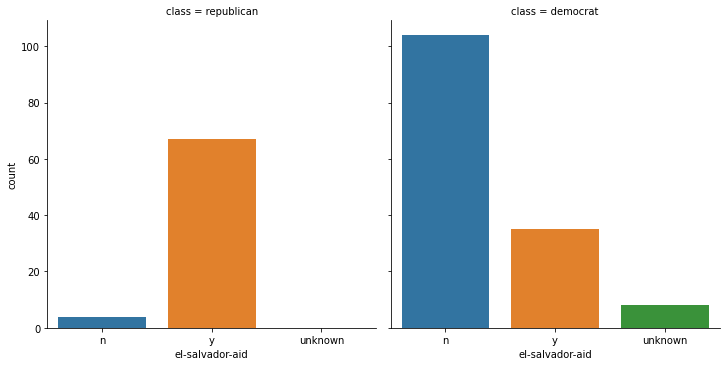

religious-groups-in-schools


/home/artmoulini/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


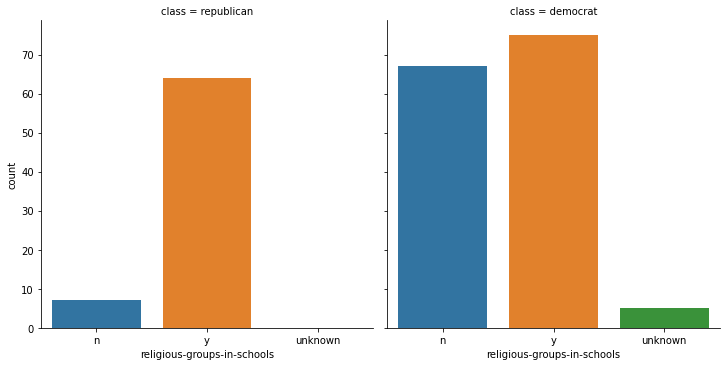

anti-satellite-test-ban


/home/artmoulini/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


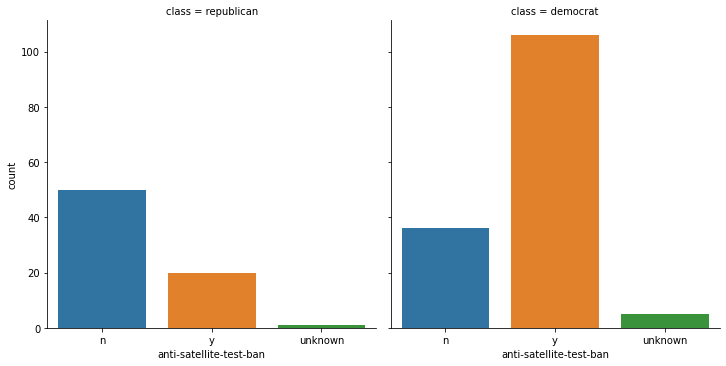

aid-to-nicaraguan-contras


/home/artmoulini/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


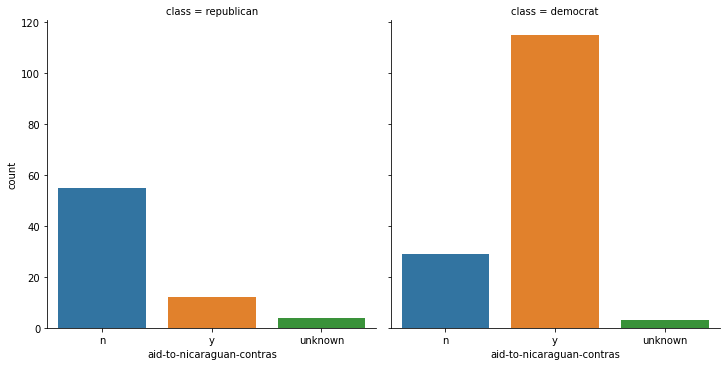

mx-missile


/home/artmoulini/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


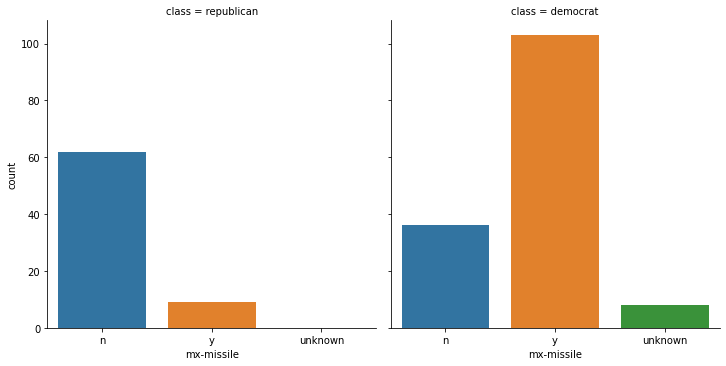

immigration


/home/artmoulini/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


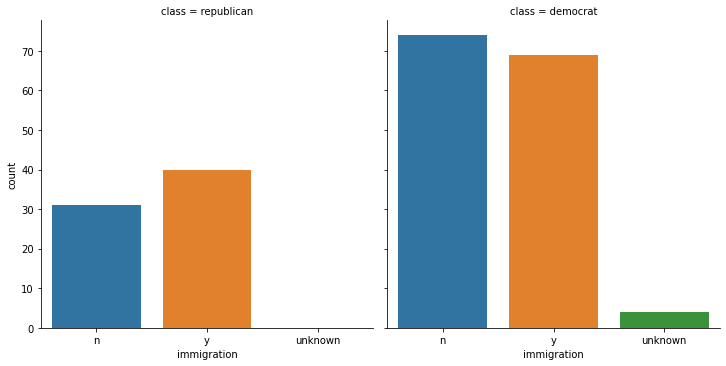

synfuels-crporation-cutback


/home/artmoulini/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


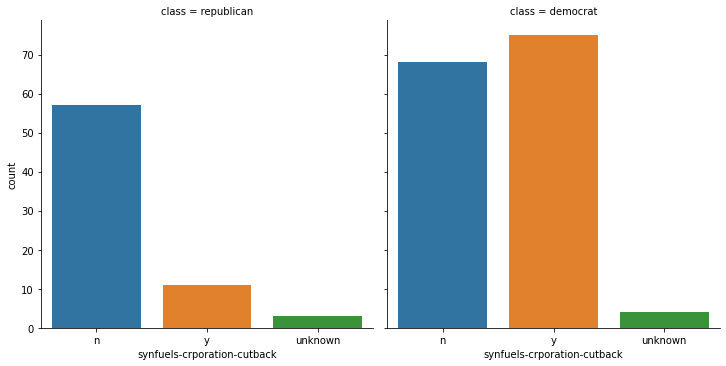

education-spending


/home/artmoulini/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


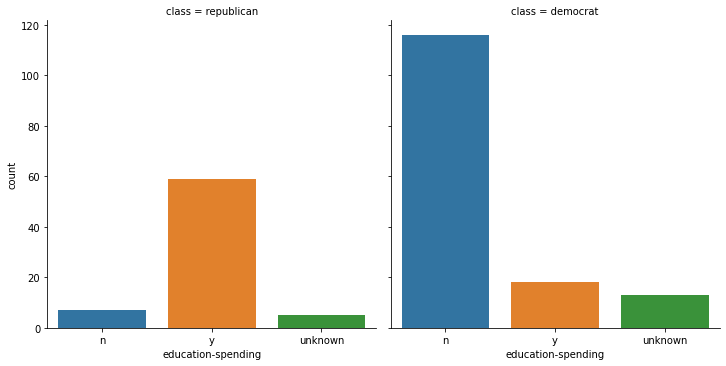

superfund-right-to-sue


/home/artmoulini/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


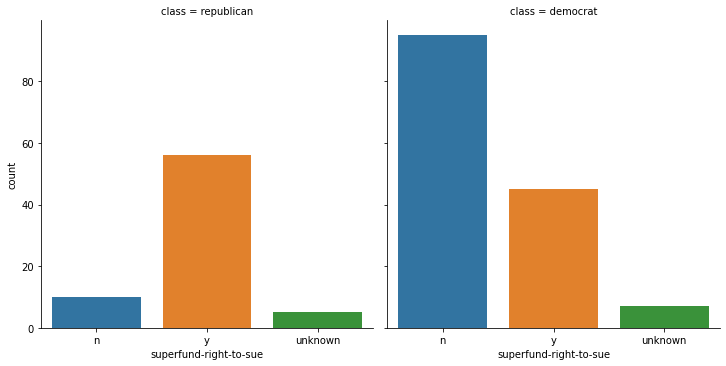

crime


/home/artmoulini/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


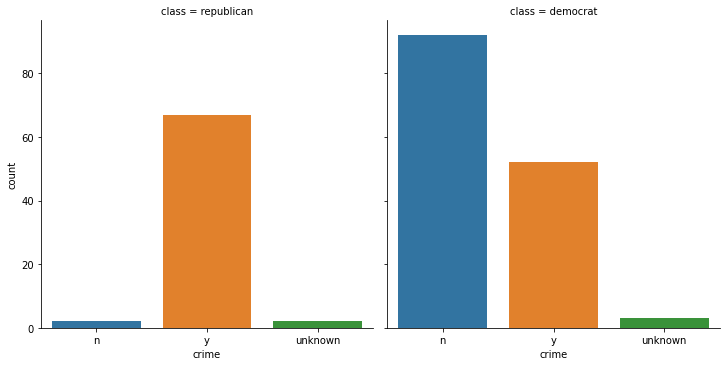

duty-free-exports


/home/artmoulini/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


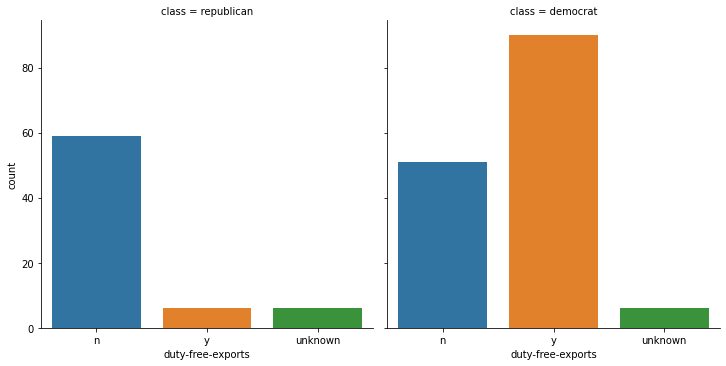

export-administration-act-south-africa


/home/artmoulini/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


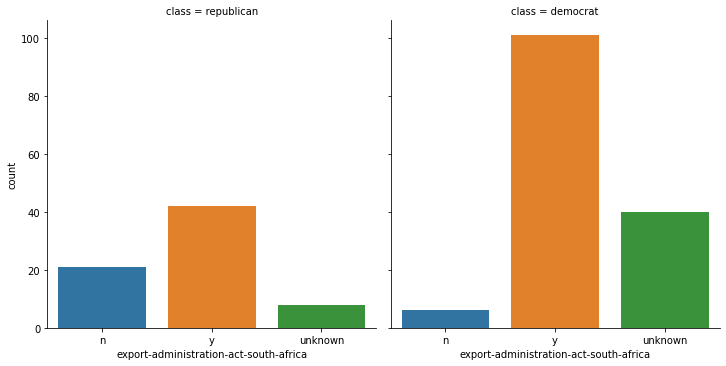

In [24]:
for col in data.columns :
    if col != "class" :
        print(col)
        sns.factorplot(data=data, kind="count", x=col, col="class", order=['n', 'y', 'unknown'])
        plt.show()

/home/artmoulini/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


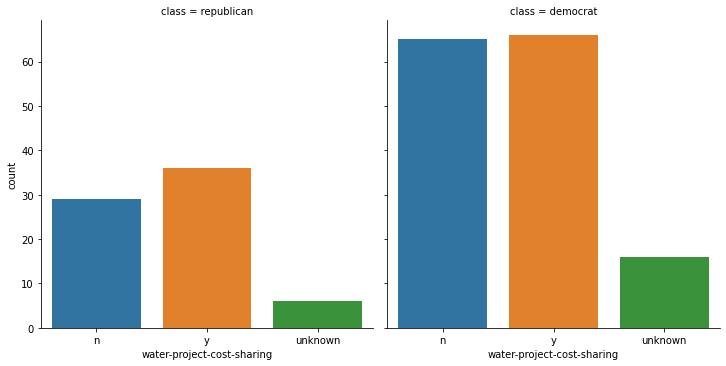

In [25]:
sns.factorplot(data=data, kind="count", x="water-project-cost-sharing", col="class", order=['n', 'y', 'unknown'])

In [26]:
repu = data[data["class"] == "republican"]
demo = data[data["class"] == "democrat"]

x = repu[data["water-project-cost-sharing"] == "n"].shape[0]
y = demo[data["water-project-cost-sharing"] == "n"].shape[0]

print(y/(y+x))

x = repu[data["water-project-cost-sharing"] == "y"].shape[0]
y = demo[data["water-project-cost-sharing"] == "y"].shape[0]

print(y/(y+x))

x = repu[data["water-project-cost-sharing"] == "unknown"].shape[0]
y = demo[data["water-project-cost-sharing"] == "unknown"].shape[0]

print(y/(y+x))

0.6914893617021277
0.6470588235294118
0.7272727272727273


<ipython-input-26-eb252d5298e8>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = repu[data["water-project-cost-sharing"] == "n"].shape[0]
<ipython-input-26-eb252d5298e8>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = demo[data["water-project-cost-sharing"] == "n"].shape[0]
<ipython-input-26-eb252d5298e8>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = repu[data["water-project-cost-sharing"] == "y"].shape[0]
<ipython-input-26-eb252d5298e8>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = demo[data["water-project-cost-sharing"] == "y"].shape[0]
<ipython-input-26-eb252d5298e8>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = repu[data["water-project-cost-sharing"] == "unknown"].shape[0]
<ipython-input-26-eb252d5298e8>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = demo

For the attribute water-project-cost-sharing, 69.15% of 'n', and 64.71% of 'y' are for the republican : too close to the 67% of overall republican --> no really relevant 

/home/artmoulini/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/artmoulini/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


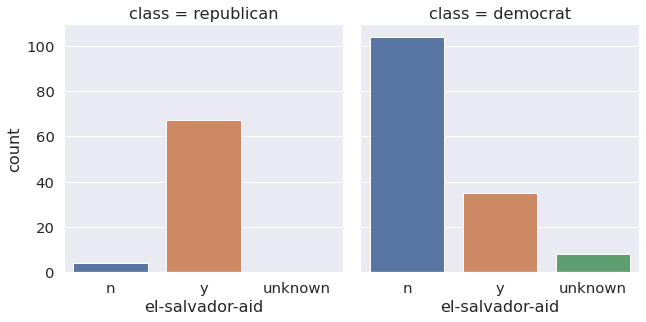

In [27]:
sns.set(font_scale=1.35)

sns.factorplot(data=data, kind="count", x="el-salvador-aid", 
               col="class", order=['n', 'y', 'unknown'],
              size=4.5)

In [28]:
x = repu[data["el-salvador-aid"] == "n"].shape[0]
y = demo[data["el-salvador-aid"] == "n"].shape[0]

print(y/(y+x))

x = repu[data["el-salvador-aid"] == "y"].shape[0]
y = demo[data["el-salvador-aid"] == "y"].shape[0]

print(y/(y+x))

x = repu[data["el-salvador-aid"] == "unknown"].shape[0]
y = demo[data["el-salvador-aid"] == "unknown"].shape[0]

print(y/(y+x))

0.9629629629629629
0.3431372549019608
1.0


<ipython-input-28-4d85282d6ba6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = repu[data["el-salvador-aid"] == "n"].shape[0]
<ipython-input-28-4d85282d6ba6>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = demo[data["el-salvador-aid"] == "n"].shape[0]
<ipython-input-28-4d85282d6ba6>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = repu[data["el-salvador-aid"] == "y"].shape[0]
<ipython-input-28-4d85282d6ba6>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = demo[data["el-salvador-aid"] == "y"].shape[0]
<ipython-input-28-4d85282d6ba6>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = repu[data["el-salvador-aid"] == "unknown"].shape[0]
<ipython-input-28-4d85282d6ba6>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = demo[data["el-salvador-aid"] == "unknown"].shape[0]


## Preprocessing

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### Drop columns

In [30]:
def dropID(df) :
    return df.drop(columns=["ID"])

In [31]:
def dropWPCS(df) :
    return df.drop(columns=["water-project-cost-sharing"])

### Encode attributes

#### For target : democrat encoded to 1, republican to 0 

In [32]:
def label_enc(val) :
    if val == "democrat" : 
        return 1
    return 0

In [33]:
def label_encode(target) : 
    return target.apply(lambda x : label_enc(x))

#### For Attributes : simple one hot encoder 

In [34]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(data[["handicapped-infants"]])
encoder.categories_

[array(['n', 'unknown', 'y'], dtype=object)]

In [35]:
def onehot(df, col):
    encoder_df = pd.DataFrame(encoder.transform(df[[col]]).toarray()) 
    
    col_name = []
    for c in encoder.categories_ :
        col_name.append(col + "_" + c)
    
    encoder_df.columns = col_name 
    return encoder_df

In [36]:
def encode(df) :
    res = pd.DataFrame() 
    
    for col in df :
        df_encoded = onehot(df, col)
        res = pd.concat([res, df_encoded], axis=1)
        
    return res

### Preprocessing function

In [37]:
def preprocessing(df) :
    X = dropID(df)
    X = encode(X)
    X.columns = X.columns.get_level_values(0)
    return X

## Train Test set 

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
train, test = train_test_split(df, test_size=0.2, random_state=0)

In [40]:
train.shape, test.shape

((174, 18), (44, 18))

In [41]:
#train = train[train["ID"] != 184] 
y = label_encode(train["class"])
X = preprocessing(train.drop(columns=["class"]))

In [42]:
X.shape, y.shape

((174, 48), (174,))

In [43]:
y_test = label_encode(test["class"])
X_test = preprocessing(test.drop(columns=["class"]))

In [44]:
X_test.shape, y_test.shape

((44, 48), (44,))

## Model selection

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from lightgbm import LGBMClassifier

import time

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [46]:
# Classifiers
classifiers = {"RandomForest" : RandomForestClassifier(random_state=0),
              "AdaBoost" : AdaBoostClassifier(random_state=0),
              "KNN" : KNeighborsClassifier(),
              "SVM" : SVC(random_state=0),
              "LGBM": LGBMClassifier(random_state=0)}

# Grids for grid search
RF_grid = {'n_estimators': [250, 300, 350, 400, 450],
           'max_depth': [4, 5, 6, 7, 8]}

Ada_grid = {'n_estimators': [100, 150,200, 250, 300, 350, 400],
        'learning_rate': [0.2, 0.3, 0.04, 0.05, 0.06]}

KNN_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11],
            'p': [1, 2]}

SVC_grid = {'C': [0.25, 0.5, 0.75, 1, 2, 4, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10]}

LGBM_grid = {"max_depth" : [2,4,6,8],
        "num_leaves" : [2,4,6,8,10,12,15]}

# Dictionary of all grids
grid = {
    "RandomForest" : RF_grid,
    "AdaBoost" : Ada_grid,
    "KNN" : KNN_grid,
    "SVM" : SVC_grid,
    "LGBM": LGBM_grid
}

In [47]:

i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':list(classifiers.keys()), 
                           'F1-Score': np.zeros(len(classifiers)), 
                           'Training time': np.zeros(len(classifiers))})

for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(classifier, param_grid=grid[key], scoring="accuracy", cv = 3, verbose=2, n_jobs = 6)

    # Train
    clf.fit(X, y)

    # Save params, score, time
    clf_best_params[key] = clf.best_params_
    valid_scores.iloc[i,1] = clf.score(X_test, y_test)
    stop = time.time()
    valid_scores.iloc[i,2] = np.round((stop - start)/60, 2)
    
    y_pred = clf.predict(X_test)
    
    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('')
    i+=1
    
valid_scores

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done  75 out of  75 | elapsed:    9.6s finished


Model: RandomForest
Training time (mins): 0.17
[[16  0]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      0.89      0.94        28

    accuracy                           0.93        44
   macro avg       0.92      0.95      0.93        44
weighted avg       0.94      0.93      0.93        44


Fitting 3 folds for each of 35 candidates, totalling 105 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    2.7s
[Parallel(n_jobs=6)]: Done 105 out of 105 | elapsed:   12.0s finished


Model: AdaBoost
Training time (mins): 0.2
[[15  1]
 [ 2 26]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.96      0.93      0.95        28

    accuracy                           0.93        44
   macro avg       0.92      0.93      0.93        44
weighted avg       0.93      0.93      0.93        44


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Model: KNN
Training time (mins): 0.0
[[14  2]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.93      0.89      0.91        28

    accuracy                           0.89        44
   macro avg       0.87      0.88      0.88        44
weighted avg       0.89      0.89      0.89        44


Fitting 3 folds for each of 84 candidates, totalling 252 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  36 out of  36 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 252 out of 252 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Model: SVM
Training time (mins): 0.01
[[14  2]
 [ 4 24]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.92      0.86      0.89        28

    accuracy                           0.86        44
   macro avg       0.85      0.87      0.86        44
weighted avg       0.87      0.86      0.87        44


Fitting 3 folds for each of 28 candidates, totalling 84 fits
Model: LGBM
Training time (mins): 0.01
[[15  1]
 [ 2 26]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.96      0.93      0.95        28

    accuracy                           0.93        44
   macro avg       0.92      0.93      0.93        44
weighted avg       0.93      0.93      0.93        44




[Parallel(n_jobs=6)]: Done  84 out of  84 | elapsed:    0.5s finished


,Classifer,F1-Score,Training time
0,RandomForest,0.931818,0.17
1,AdaBoost,0.931818,0.20
2,KNN,0.886364,0.00
3,SVM,0.863636,0.01
4,LGBM,0.931818,0.01


In [48]:
# Show best parameters from grid search
clf_best_params

{'RandomForest': {'max_depth': 6, 'n_estimators': 300},
 'AdaBoost': {'learning_rate': 0.2, 'n_estimators': 200},
 'KNN': {'n_neighbors': 5, 'p': 1},
 'SVM': {'C': 0.75, 'gamma': 'scale', 'kernel': 'rbf'},
 'LGBM': {'max_depth': 2, 'num_leaves': 4}}

## Final model

In [49]:
train = pd.read_csv("CongressionalVotingID.shuf.lrn.csv", sep=',')
test = pd.read_csv("CongressionalVotingID.shuf.tes.csv", sep=',')

# train set
X_train = train.drop(columns=["class"])
y_train = train["class"]

# test set
X_test = test

In [50]:
# Preprocessing
X_train = preprocessing(X_train)
X_test = preprocessing(X_test)

y_train = label_encode(y_train)

In [51]:
best_classifiers = {
    "AdaBoost" : AdaBoostClassifier(**clf_best_params["AdaBoost"], random_state=0),
    "LGBM" : LGBMClassifier(**clf_best_params["LGBM"], random_state=0)
}

In [52]:
X_train = np.array(X_train.copy())
y_train = np.array(y_train.copy())

# Number of folds in cross validation
FOLDS=10
preds=np.zeros(len(X_test))

for key, classifier in best_classifiers.items():
    start = time.time()
    
    cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=0)
    
    score=0
    for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train)):
        # Get training and validation sets
        X_corss, X_valid = X_train[train_idx], X_train[val_idx]
        y_cross, y_valid = y_train[train_idx], y_train[val_idx]

        # Train model
        clf = classifier
        clf.fit(X_corss, y_cross)

        # Make predictions and measure accuracy
        preds += clf.predict_proba(X_test)[:,1]
        score += clf.score(X_valid, y_valid)

    # Average accuracy    
    score=score/FOLDS
    
    # Stop timer
    stop = time.time()

    # Print accuracy and time
    print('Model:', key)
    print('Average validation accuracy:', np.round(100*score,2))
    print('Training time (mins):', np.round((stop - start)/60,2))
    print('')
    
# Ensemble predictions
preds=preds/(FOLDS*len(best_classifiers))

Model: AdaBoost
Average validation accuracy: 95.41
Training time (mins): 0.04

Model: LGBM
Average validation accuracy: 95.41
Training time (mins): 0.01



## Predictions

In [53]:
y_pred = np.round(preds).astype(int)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [54]:
predictions = []
for p in y_pred :
    val = int(p)
    if (p == 1):
        predictions.append("democrat")
    else : 
        predictions.append("republican")

In [55]:
predictions

['republican',
 'democrat',
 'democrat',
 'republican',
 'republican',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'republican',
 'republican',
 'republican',
 'republican',
 'republican',
 'republican',
 'democrat',
 'republican',
 'democrat',
 'democrat',
 'republican',
 'democrat',
 'republican',
 'republican',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'republican',
 'republican',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'republican',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'republican',
 'democrat',
 'republican',
 'republican',
 'republican',
 'democrat',
 'democrat',
 'republican',
 'republican',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'republican',
 'republican',
 'democrat',
 'democrat',
 'republican',
 'democrat',
 'democrat',
 'democrat',
 'republican',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'republican

In [56]:
final = pd.DataFrame()
final["ID"] = test["ID"]
final["class"] = predictions

final

,ID,class
0,275,republican
1,266,democrat
2,247,democrat
3,328,republican
4,232,republican
...,...,...
212,291,democrat
213,76,democrat
214,123,republican
215,416,democrat


In [57]:
final.to_csv("groupe06.csv", index=False)